<a href="https://colab.research.google.com/github/Yofandra/PCVK_Ganjil_2023/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### 2.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image


In [5]:
img_m = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

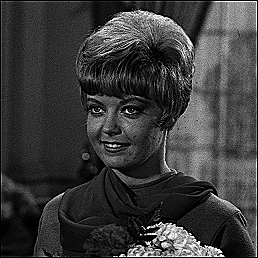

In [6]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen,1,2))

### 3.

##### Emboss

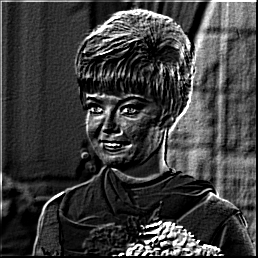

In [7]:
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss,1,2))

##### Left Sobel Edge Detection

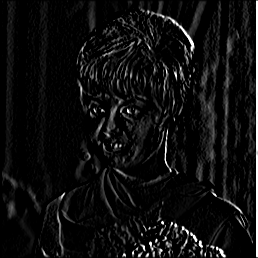

In [8]:
kernel_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel,1,2))

##### Canny Edge Detection

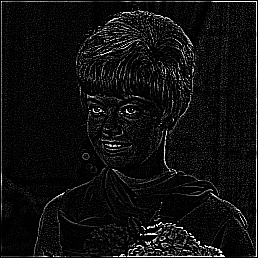

In [9]:
kernel_canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_canny,1,2))

##### Prewitt Edge Detection

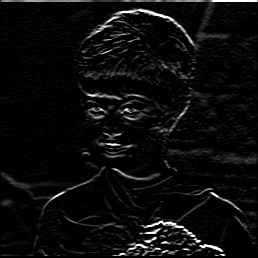

In [10]:
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt,1,2))

##### 5x5 Gaussian Blur

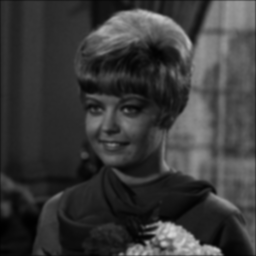

In [11]:
kernel_blur5 = np.array([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, kernel_blur5,1,2))

##### 21x21 Gaussian Blur

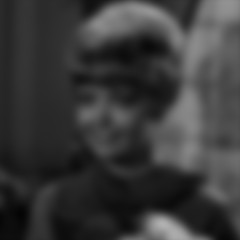

In [19]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel,1,2))


### Tugas

##### KTP 1

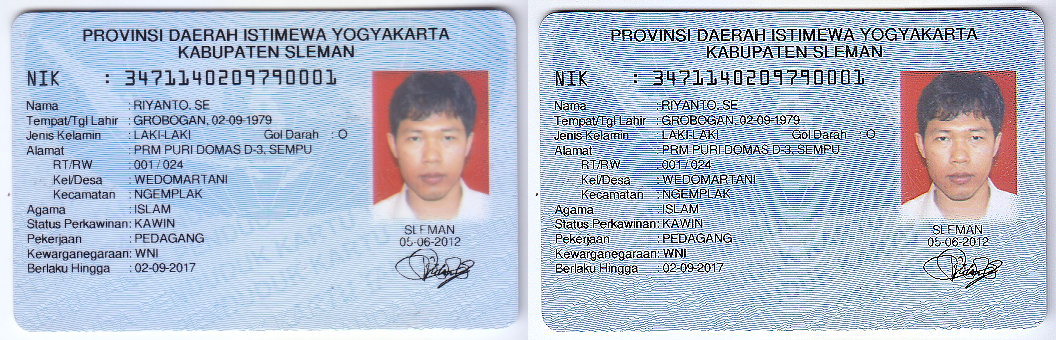

In [45]:
import cv2
ktp1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/ktp/ktp.png')
ktp_1 = cv.resize(ktp1, (0,0), fx=0.5, fy=0.5)
sharpened_image1 = cv2.filter2D(ktp_1, -1, kernel_sharpen)
emboss_image1 = cv2.filter2D(ktp_1, -1, kernel_emboss)
#merge1 = cv2.merge(sharpened_image1, emboss_image1)
final_frame1 = cv.hconcat((ktp_1, sharpened_image1))
cv2_imshow(final_frame1)